In [3]:
import numpy as np
import pandas as pd

# Run implementation.py
%run implementation.py

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [105]:
class KArmedTestbed:
    def __init__(self, k, means=None, variances=None):
        self.k = k
        if means: self.means = means
        else: self.means = np.zeros(k)
        if variances: self.variances = means
        else: self.variances = np.ones(k)
            
    def walk(self, mean=0, variance=0.01):
        self.means = self.means + np.random.normal(mean, variance, self.k)
        
    def display(self,):
        data = np.array([np.random.normal(mean, variance, 1000) for (mean, variance) in zip(self.means, self.variances)])
        fig, ax = plt.subplots()
        sns.violinplot(data=data.T, ax=ax)
        ax.set_xlabel("Action")
        ax.set_ylabel("Reward Distribution")
        return fig

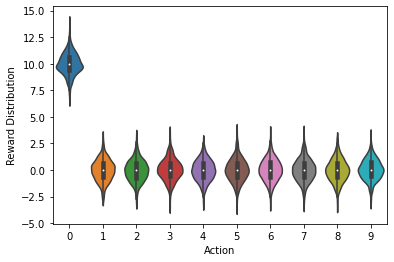

In [175]:
actions = 10
ten_armed_testbed = KArmedTestbed(actions, means=[10,0,0,0,0,0,0,0,0,0])
ten_armed_testbed.display()
print()

In [176]:
class EGreedy:
    def __init__(self, actions, alpha=1, epsilon=0.1):
        self.actions = actions
        self.alpha = alpha
        self.epsilon = epsilon
        # TODO: implement realistic, random, and optimistic
        self.observations = {}
        for action in self.actions:
            self.observations[action] = 0
        
        # current step
        self.current_step = 1
            
    def act_observe_update(self, k_armed_testbed):
        # 1) Act
        random_number = np.random.rand()
        if random_number > 1 - self.epsilon:
            # explore
            action = np.random.choice(self.actions)
        else:
            # exploit
            max_value_keys = [key for key in self.observations.keys() \
                              if self.observations[key] == max(self.observations.values())]
            action = np.random.choice(max_value_keys)
        # 2) Observe    
        mean = k_armed_testbed.means[action]
        variance = k_armed_testbed.variances[action]
        reward = np.random.normal(mean, variance)
        # 3) Update
        self.observations[action] = self.observations[action] + \
        ((1/self.current_step)*(reward-self.observations[action]))
        self.current_step = self.current_step + 1
        return action, reward
        
    def print_observations(self,):
        print(self.observations)

In [178]:
e_greedy = EGreedy(list(range(actions)), 0.1)
for i in range(1000):
    e_greedy.print_observations()
    action, reward = e_greedy.act_observe_update(ten_armed_testbed)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: -1.619712002369667, 8: 0, 9: 0}
{0: 0, 1: 0.572262729448093, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: -1.619712002369667, 8: 0, 9: 0}
{0: 0, 1: -0.3528570333494979, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: -1.619712002369667, 8: 0, 9: 0}
{0: 0, 1: -0.3528570333494979, 2: 0, 3: 0, 4: 0, 5: -0.00887036236114435, 6: 0, 7: -1.619712002369667, 8: 0, 9: 0}
{0: 0, 1: -0.3528570333494979, 2: 0, 3: -0.14681375883700812, 4: 0, 5: -0.00887036236114435, 6: 0, 7: -1.619712002369667, 8: 0, 9: 0}
{0: 0, 1: -0.3528570333494979, 2: 0, 3: -0.14681375883700812, 4: 0, 5: -0.00887036236114435, 6: 0, 7: -1.619712002369667, 8: 0, 9: 0.19000629941163918}
{0: 0, 1: -0.3528570333494979, 2: 0, 3: -0.14681375883700812, 4: 0, 5: -0.00887036236114435, 6: 0, 7: -1.619712002369667, 8: 0, 9: 0.19992057953815726}
{0: 0, 1: -0.3528570333494979, 2: 0, 3: -0.14681375883700812, 4: 0, 5: -0.00887036236114435, 6: 0, 7: -1.6197120023696